<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Unsupervised%20Learning/KMC/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


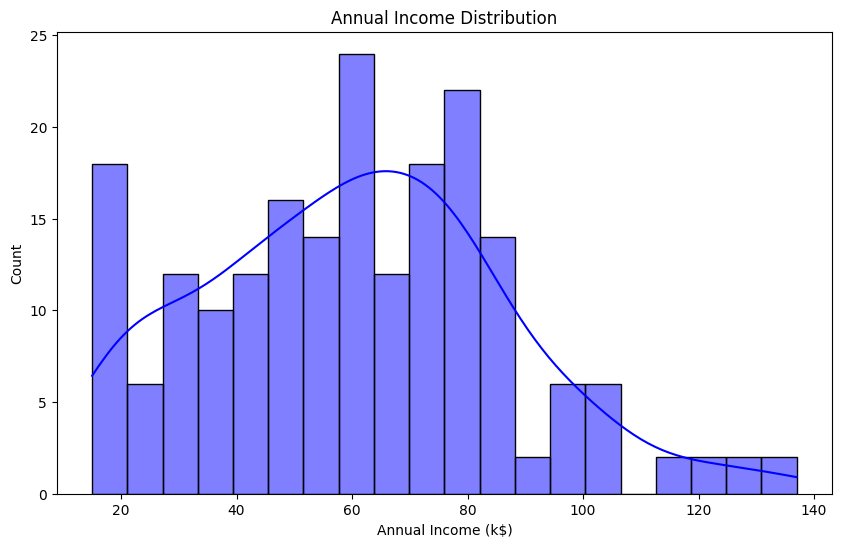

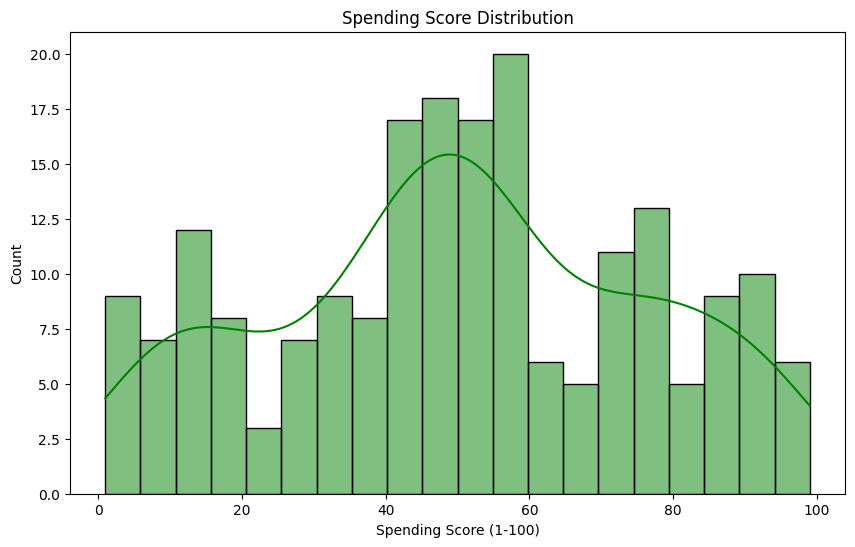

In [3]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20, color='blue')
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20, color='green')
plt.title("Spending Score Distribution")
plt.show()


In [4]:
# Select features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


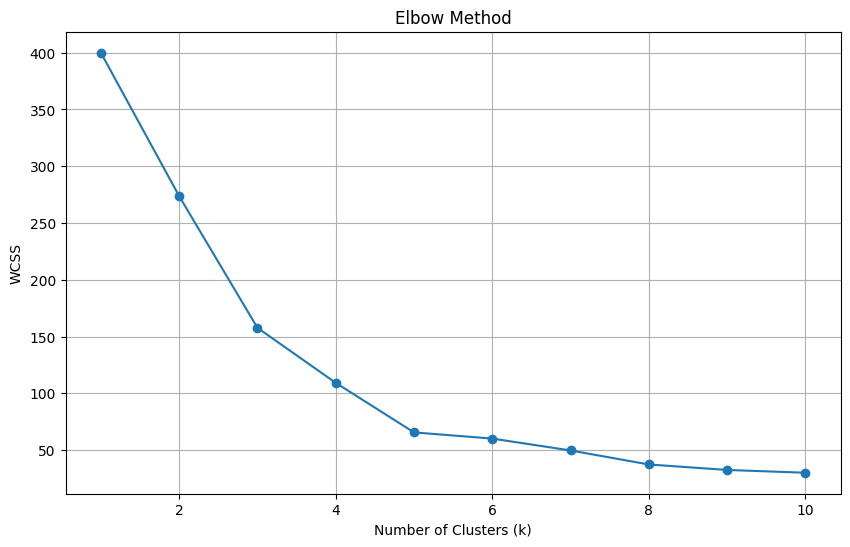

In [5]:
# Compute WCSS for different k values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid()
plt.show()


In [6]:
# Apply K-Means with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = labels


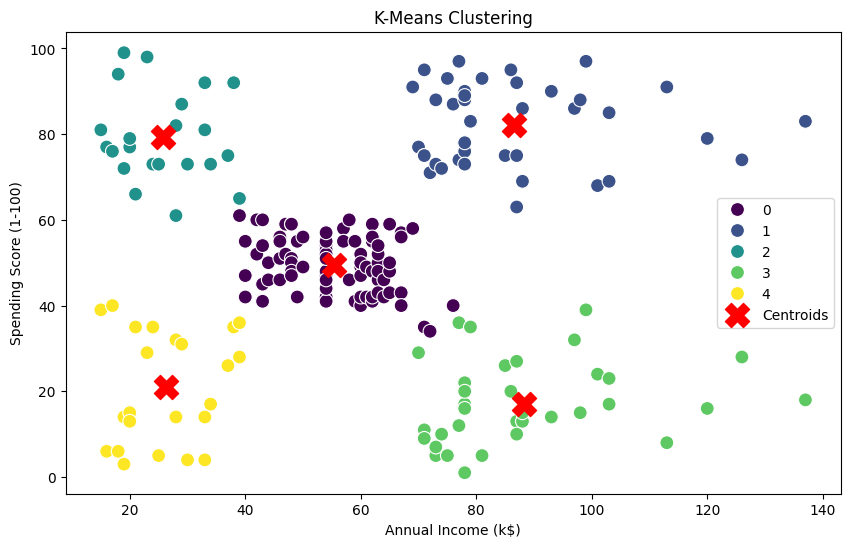

In [7]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=data,
    palette='viridis',
    s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],
    kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],
    s=300, c='red', marker='X', label='Centroids'
)
plt.title("K-Means Clustering")
plt.legend()
plt.show()


In [8]:
# Compute Silhouette Score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.55
